<a href="https://colab.research.google.com/github/Akshithakarampuri/XAI_lab_pratical/blob/main/XAI_Lab_assign3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lime


/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)



Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       749
           1       0.87      0.97      0.92       194

    accuracy                           0.96       943
   macro avg       0.93      0.97      0.95       943
weighted avg       0.97      0.96      0.96       943

Confusion Matrix:
 [[720  29]
 [  5 189]]
Accuracy: 0.9639448568398727


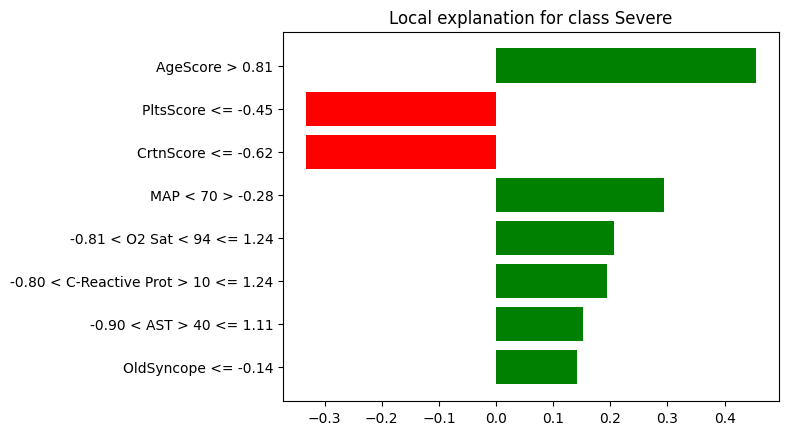

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import lime.lime_tabular
import matplotlib.pyplot as plt

df=pd.read_excel("/content/Mortality_incidence_sociodemographic_and_clinical_data_in_COVID19_patients.xlsx")

# --- 1. Preprocess ---
# Convert Severity to binary: <=5 = mild, >5 = severe
df["SeverityBinary"] = (df["Severity"] > 5).astype(int)

# Drop non-numeric / ID-like columns
drop_cols = ["Severity", "SeverityBinary", "Death", "Age", "Derivation cohort"]
X = df.drop(columns=drop_cols, errors="ignore")
y = df["SeverityBinary"]

# Handle any missing values (fill with median)
X = X.apply(pd.to_numeric, errors="coerce").fillna(X.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 2. Logistic Regression ---
model = LogisticRegression(max_iter=500, class_weight="balanced")
model.fit(X_train_scaled, y_train)

# Evaluate
y_pred = model.predict(X_test_scaled)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# --- 3. LIME explanation ---
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=X.columns,
    class_names=["Mild", "Severe"],
    mode="classification"
)

# Explain one patient
i = 10
exp = explainer.explain_instance(X_test_scaled[i], model.predict_proba, num_features=8)
exp.show_in_notebook(show_table=True)

# Optional plot
fig = exp.as_pyplot_figure()
plt.show()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=e06db36be211db3abc5cd032124cd7cad78a8aab6674e1be31c7189b77a303d3
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime
LIME package successfully imported!
Loading IoT Intrusion Dataset...
Dataset shape: (10000, 11)
Columns: ['packet_size', 'protocol_type', 'duration', 'src_bytes', 'dst_bytes', 'count', 'srv_count', 'dst_host_count', 'dst_host_srv_count', 'flag', 'label']
Label distribution:
label
0    8587
1    1413
Name: count, dtype: int64
Attack rate: 14.13%

Preprocessing data and training Random Forest model...

Model Evaluation:
Accuracy: 0.9507
ROC AUC: 0.8343

Classification Report:
              precision    recall  f1-score   support

      Normal       0.95      1.00      0.97      2576
      Atta

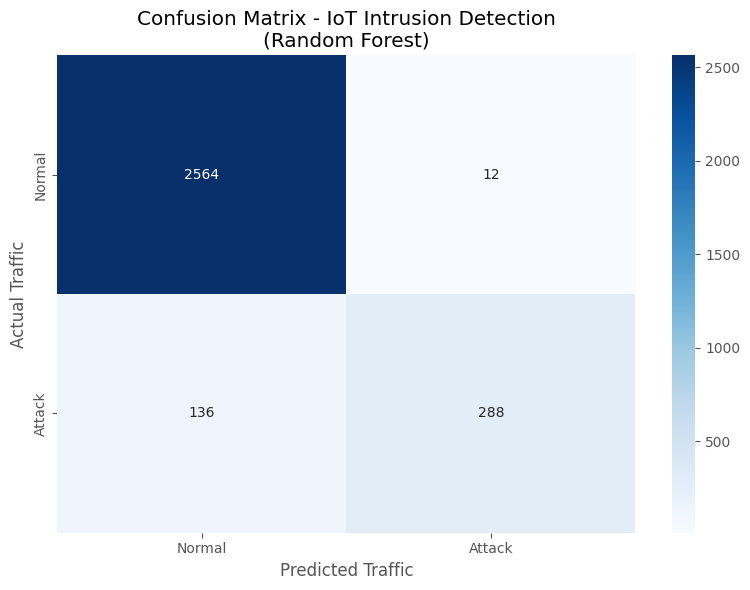


Applying model interpretation...


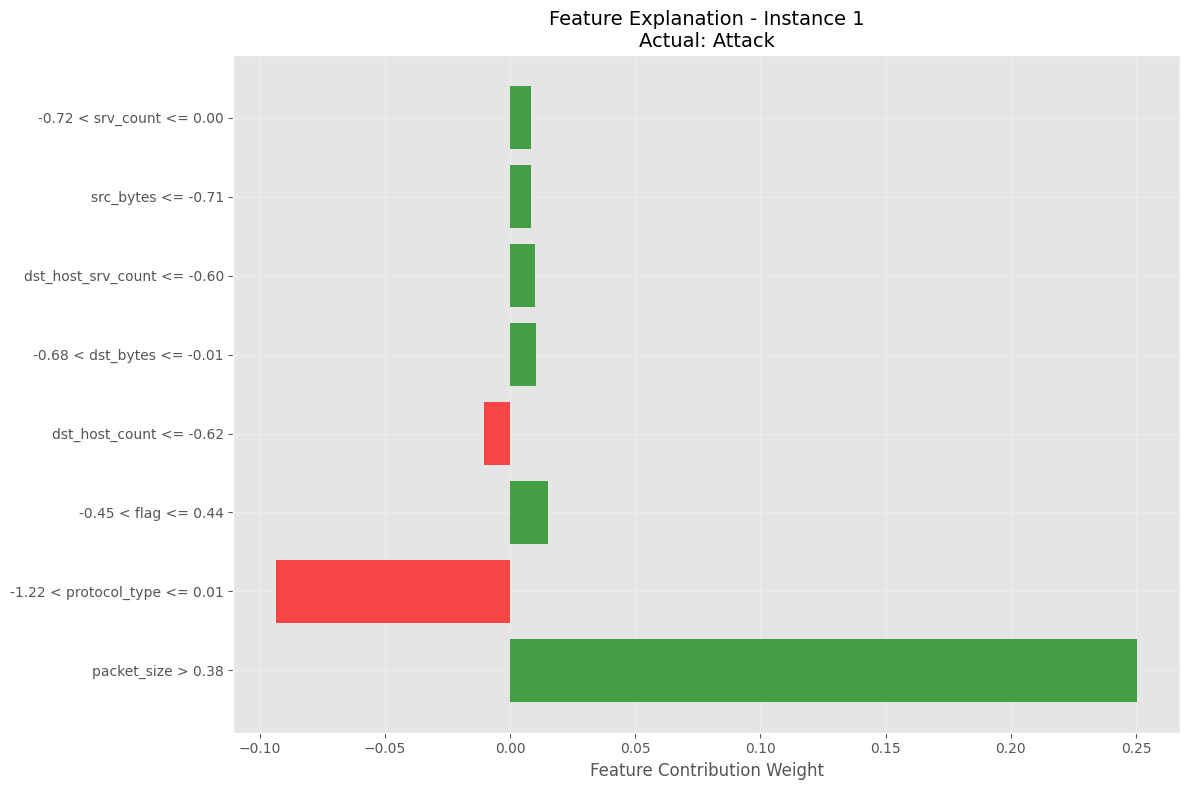

Top contributing features:
  packet_size > 0.38: 0.2504 (indicates ATTACK)
  -1.22 < protocol_type <= 0.01: -0.0933 (indicates NORMAL)
  -0.45 < flag <= 0.44: 0.0151 (indicates ATTACK)
  dst_host_count <= -0.62: -0.0104 (indicates NORMAL)
  -0.68 < dst_bytes <= -0.01: 0.0102 (indicates ATTACK)


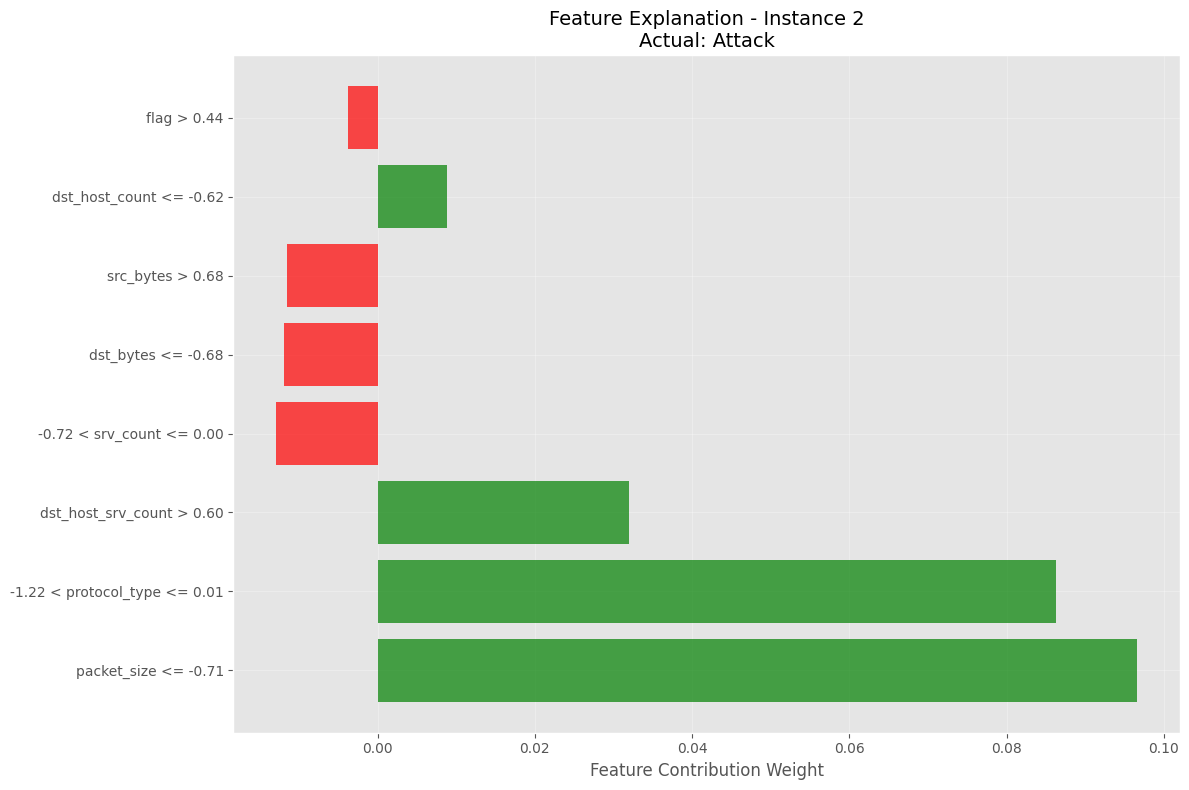

Top contributing features:
  packet_size <= -0.71: 0.0966 (indicates ATTACK)
  -1.22 < protocol_type <= 0.01: 0.0863 (indicates ATTACK)
  dst_host_srv_count > 0.60: 0.0320 (indicates ATTACK)
  -0.72 < srv_count <= 0.00: -0.0128 (indicates NORMAL)
  dst_bytes <= -0.68: -0.0119 (indicates NORMAL)


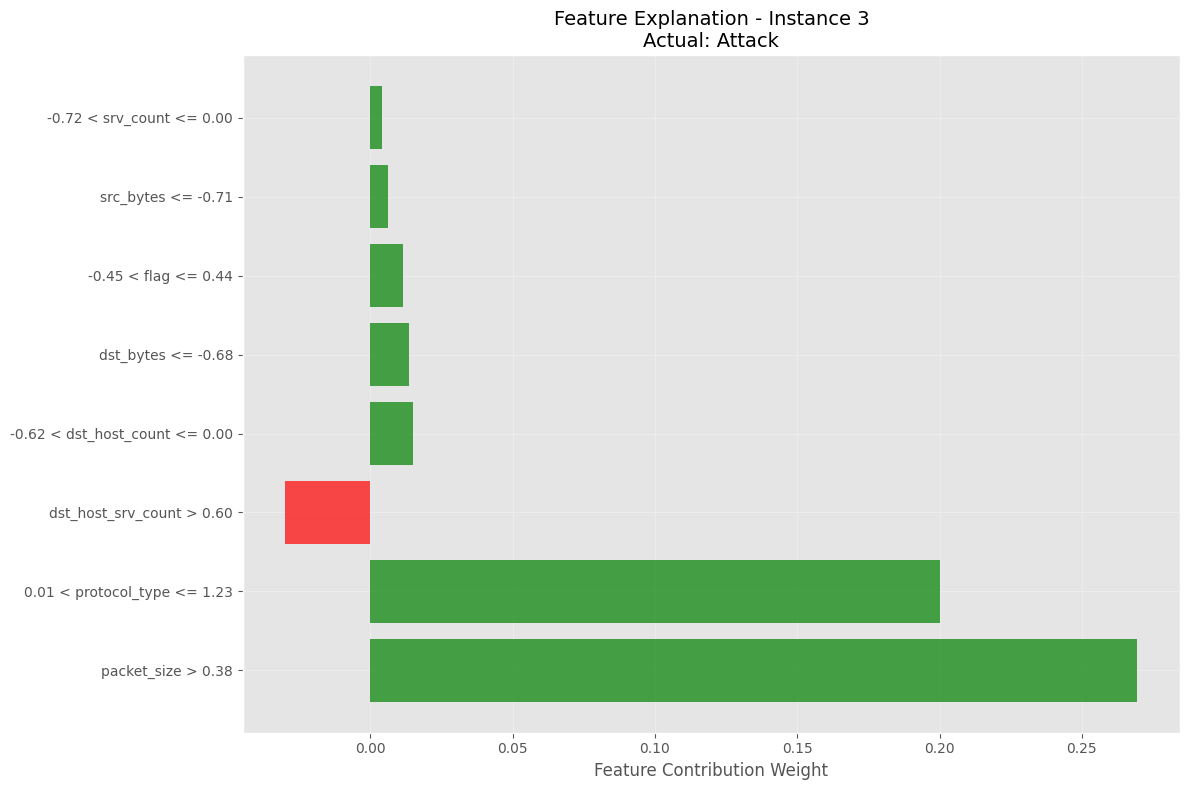

Top contributing features:
  packet_size > 0.38: 0.2695 (indicates ATTACK)
  0.01 < protocol_type <= 1.23: 0.2000 (indicates ATTACK)
  dst_host_srv_count > 0.60: -0.0298 (indicates NORMAL)
  -0.62 < dst_host_count <= 0.00: 0.0150 (indicates ATTACK)
  dst_bytes <= -0.68: 0.0134 (indicates ATTACK)


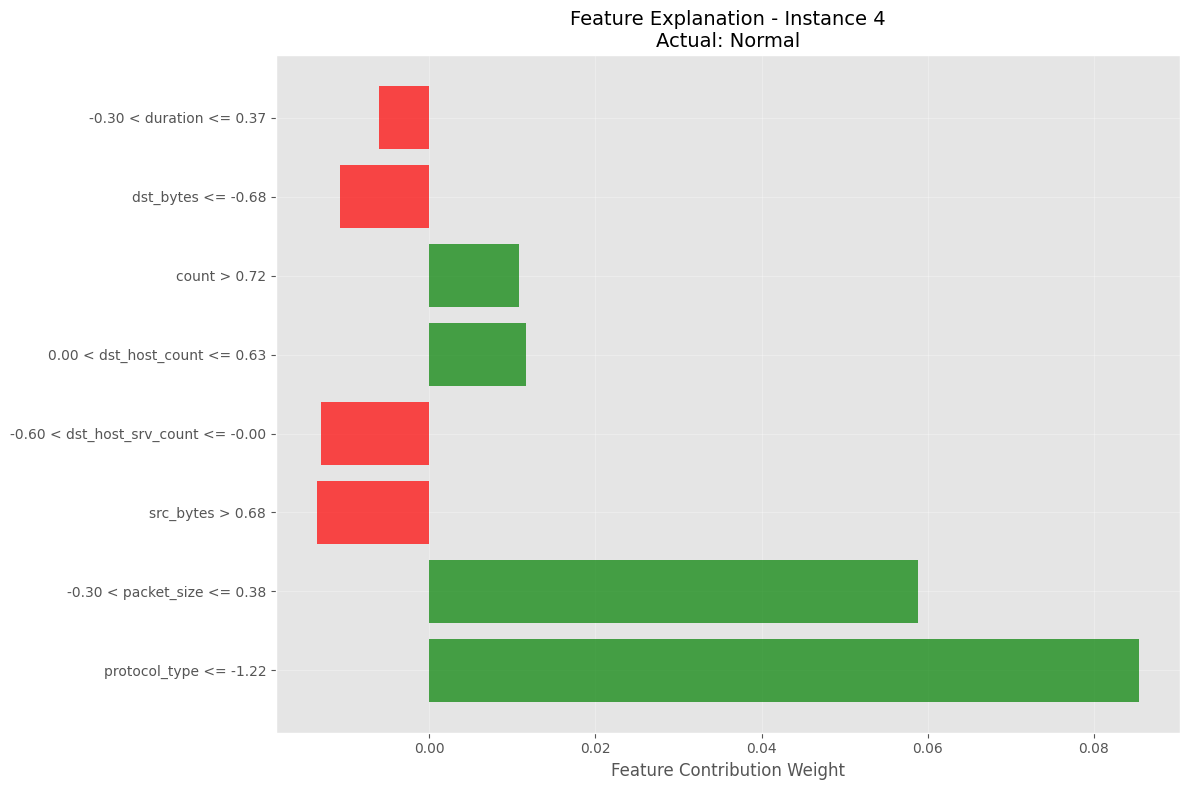

Top contributing features:
  protocol_type <= -1.22: 0.0854 (indicates ATTACK)
  -0.30 < packet_size <= 0.38: 0.0588 (indicates ATTACK)
  src_bytes > 0.68: -0.0135 (indicates NORMAL)
  -0.60 < dst_host_srv_count <= -0.00: -0.0130 (indicates NORMAL)
  0.00 < dst_host_count <= 0.63: 0.0116 (indicates ATTACK)


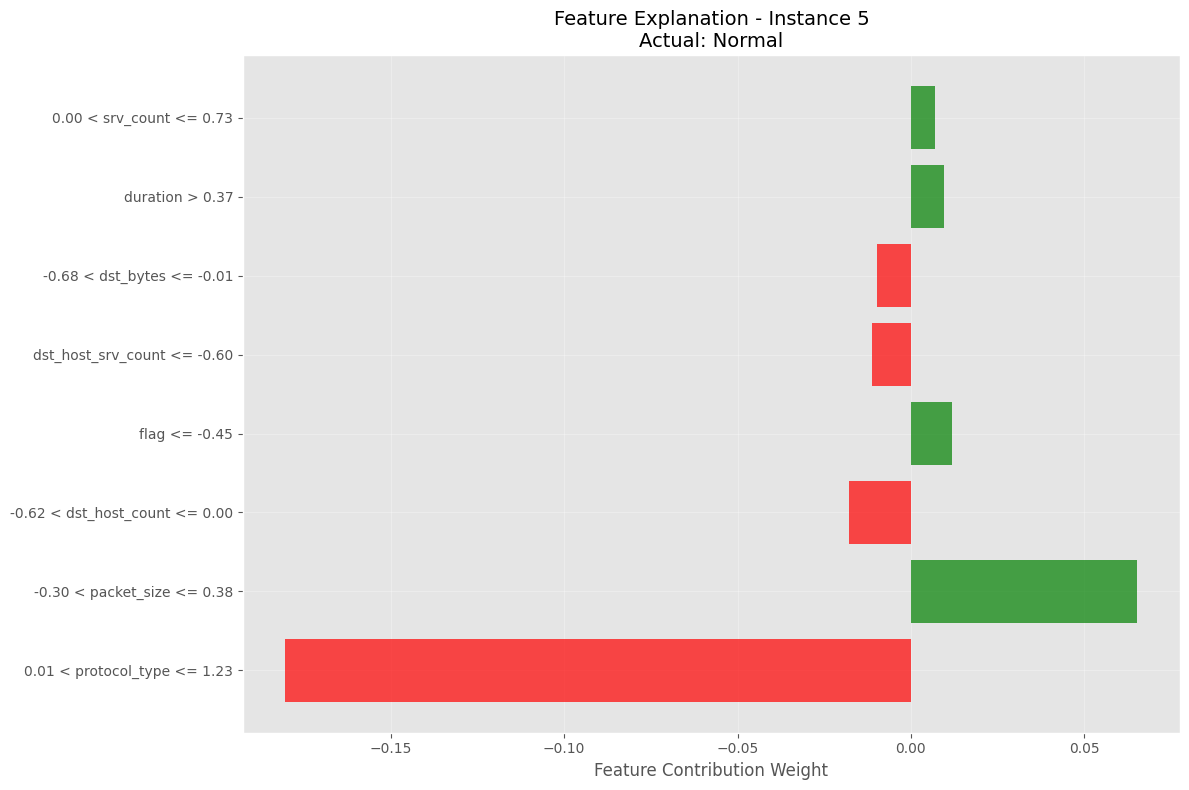

Top contributing features:
  0.01 < protocol_type <= 1.23: -0.1803 (indicates NORMAL)
  -0.30 < packet_size <= 0.38: 0.0653 (indicates ATTACK)
  -0.62 < dst_host_count <= 0.00: -0.0177 (indicates NORMAL)
  flag <= -0.45: 0.0117 (indicates ATTACK)
  dst_host_srv_count <= -0.60: -0.0114 (indicates NORMAL)


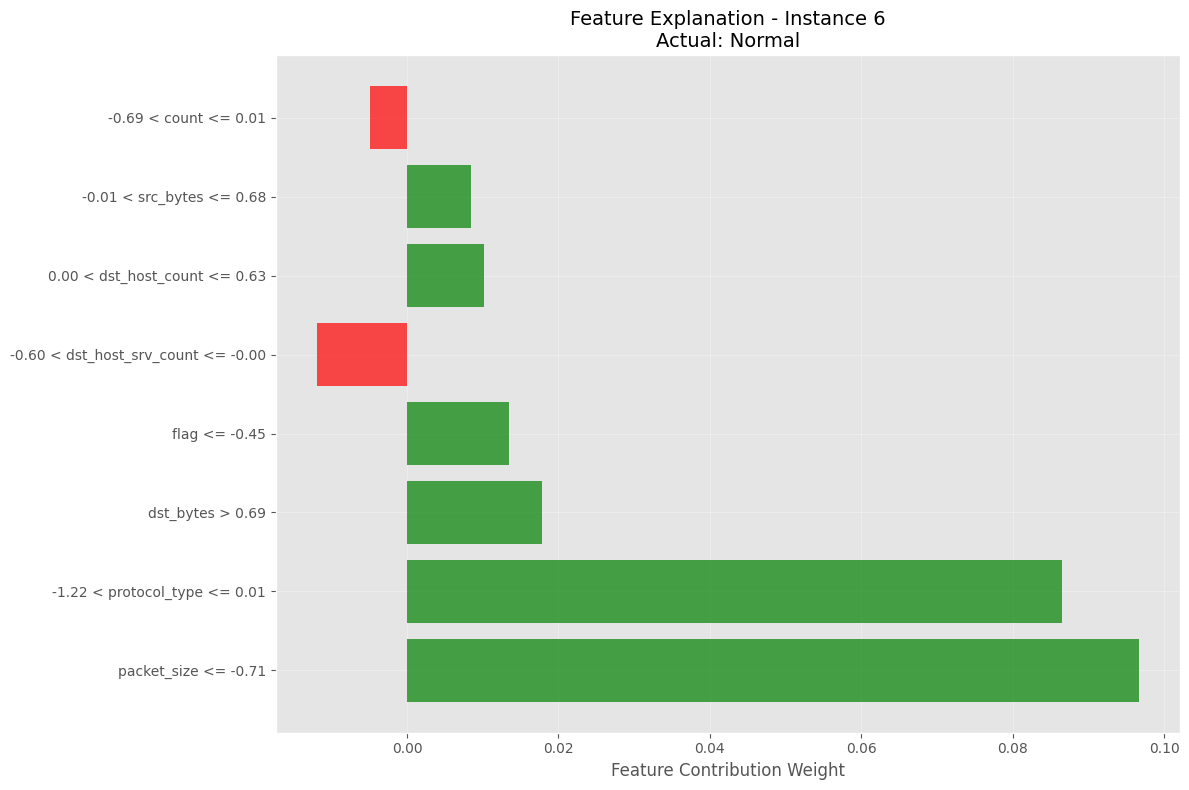

Top contributing features:
  packet_size <= -0.71: 0.0967 (indicates ATTACK)
  -1.22 < protocol_type <= 0.01: 0.0865 (indicates ATTACK)
  dst_bytes > 0.69: 0.0178 (indicates ATTACK)
  flag <= -0.45: 0.0134 (indicates ATTACK)
  -0.60 < dst_host_srv_count <= -0.00: -0.0119 (indicates NORMAL)

Analyzing feature importance...


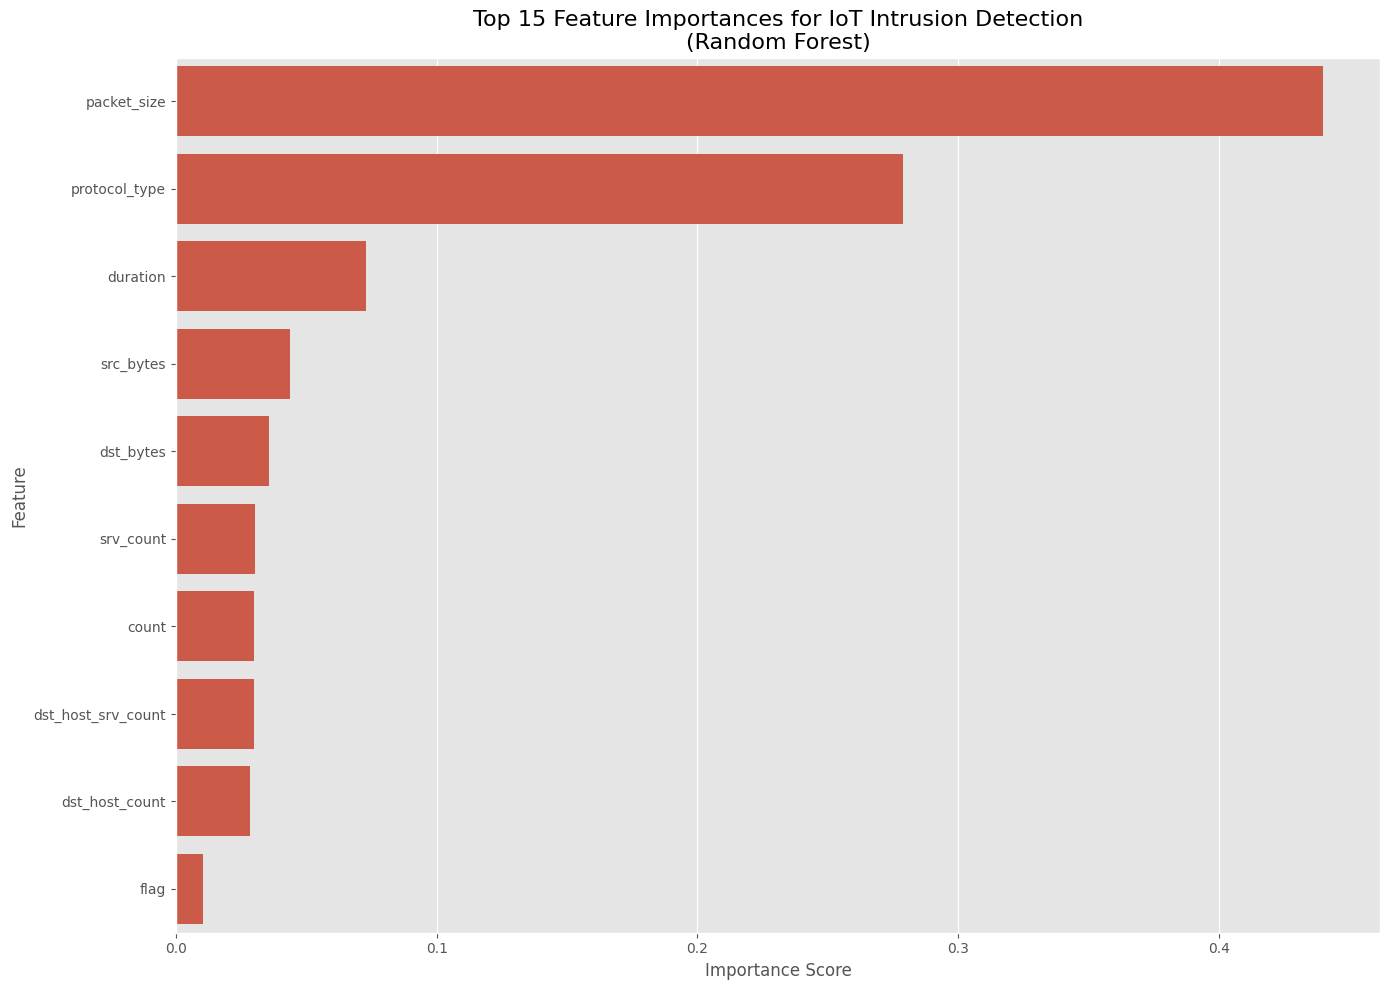


Generating cybersecurity report...

CYBERSECURITY REPORT: IOT INTRUSION DETECTION SYSTEM

System Overview:
- Total network traffic analyzed: 10000
- Normal traffic: 8587 (85.9%)
- Attack traffic: 1413 (14.1%)
- Features analyzed: 10
- Interpretation method: LIME

Model Performance Metrics:
- Detection Accuracy: 0.9507
- ROC AUC Score: 0.8343
- Attack Detection Precision: 0.9600
- Attack Detection Recall: 0.6792

Key Security Findings:

1. Critical Attack Indicators Identified:
   - packet_size: 0.4397
   - protocol_type: 0.2788
   - duration: 0.0730

2. Security Interpretation of Key Features:
   - Packet Size: Unusually large packets may indicate DDoS attacks or data exfiltration
   - Protocol Type: Specific protocols (ICMP) are often abused in network attacks
   - Duration: Very short connections may indicate scanning or reconnaissance activity
   - Source Bytes: High outbound traffic may indicate data theft or botnet activity
   - Connection Count: Excessive connections may indicat

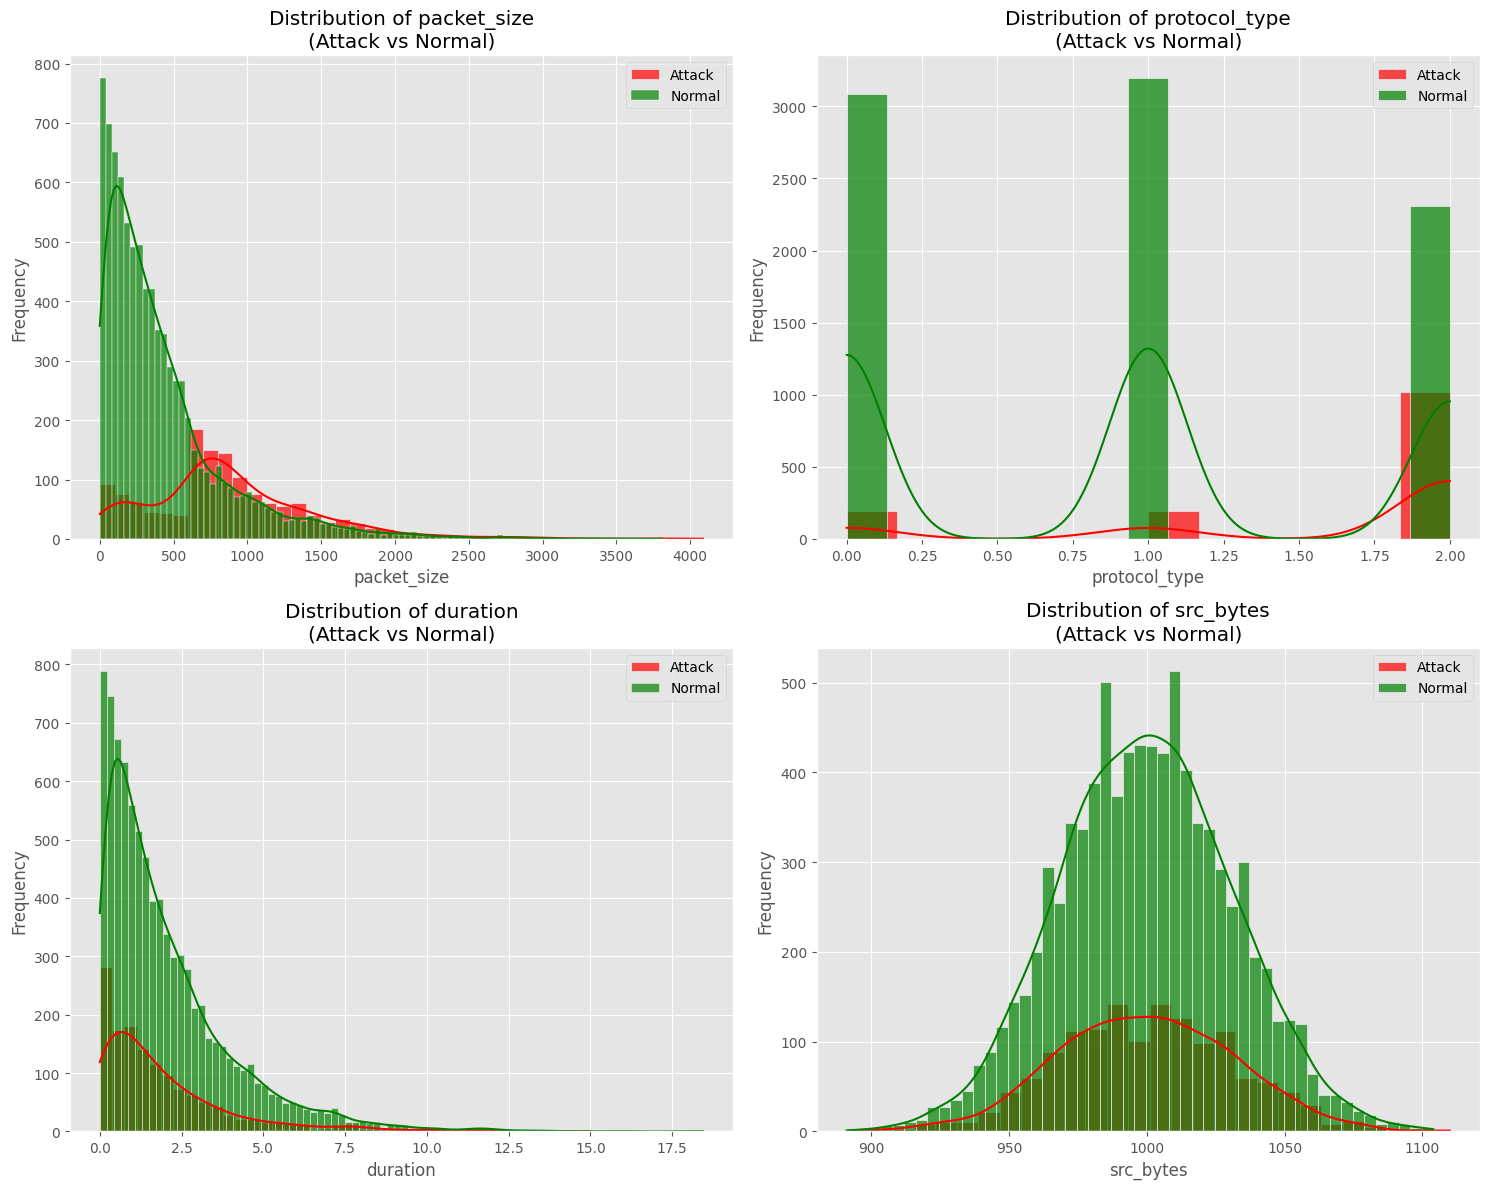

In [1]:
# First, install required packages
!pip install pandas numpy matplotlib seaborn scikit-learn lime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

# Try to import LIME, if not available, we'll use alternative methods
try:
    from lime.lime_tabular import LimeTabularExplainer
    LIME_AVAILABLE = True
    print("LIME package successfully imported!")
except ImportError:
    LIME_AVAILABLE = False
    print("LIME package not available. Using alternative visualization methods.")

# Set style for plots
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

# 1. Load IoT Intrusion Dataset
print("Loading IoT Intrusion Dataset...")

# Create synthetic IoT data for demonstration
def create_synthetic_iot_data(n_samples=10000):
    """Create synthetic IoT data for demonstration"""
    np.random.seed(42)

    # Generate synthetic features typical of IoT network traffic
    data = {
        'packet_size': np.random.exponential(500, n_samples),
        'protocol_type': np.random.choice([0, 1, 2], n_samples),  # 0: TCP, 1: UDP, 2: ICMP
        'duration': np.random.exponential(2, n_samples),
        'src_bytes': np.random.poisson(1000, n_samples),
        'dst_bytes': np.random.poisson(800, n_samples),
        'count': np.random.poisson(50, n_samples),
        'srv_count': np.random.poisson(30, n_samples),
        'dst_host_count': np.random.poisson(40, n_samples),
        'dst_host_srv_count': np.random.poisson(25, n_samples),
        'flag': np.random.choice([0, 1, 2, 3], n_samples),  # Network flags
    }

    df = pd.DataFrame(data)

    # Create synthetic attack patterns
    attack_conditions = (
        (df['packet_size'] > 800) & (df['duration'] < 0.1) |
        (df['src_bytes'] > 2000) & (df['dst_bytes'] < 100) |
        (df['count'] > 100) & (df['srv_count'] < 10) |
        (df['protocol_type'] == 2) & (df['packet_size'] > 600)
    )

    df['label'] = np.where(attack_conditions, 1, 0)  # 1: Attack, 0: Normal

    # Add some noise
    noise_indices = np.random.choice(df.index, size=int(n_samples*0.05), replace=False)
    df.loc[noise_indices, 'label'] = 1 - df.loc[noise_indices, 'label']

    return df

# Create synthetic data
iot_df = create_synthetic_iot_data(10000)

print(f"Dataset shape: {iot_df.shape}")
print(f"Columns: {list(iot_df.columns)}")
print(f"Label distribution:\n{iot_df['label'].value_counts()}")
print(f"Attack rate: {(iot_df['label'].mean()*100):.2f}%")

# 2. Preprocess data and train Random Forest
print("\nPreprocessing data and training Random Forest model...")

# Separate features and target
X = iot_df.drop('label', axis=1)
y = iot_df['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)

# Evaluate the model
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba[:, 1]):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Attack']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Attack'],
            yticklabels=['Normal', 'Attack'])
plt.title('Confusion Matrix - IoT Intrusion Detection\n(Random Forest)')
plt.ylabel('Actual Traffic')
plt.xlabel('Predicted Traffic')
plt.tight_layout()
plt.savefig('iot_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Apply LIME or alternative for model interpretation
print("\nApplying model interpretation...")

def create_custom_explanation(model, instance, feature_names, class_names):
    """Create custom explanation when LIME is not available"""
    prediction = model.predict(instance.reshape(1, -1))[0]
    prediction_proba = model.predict_proba(instance.reshape(1, -1))[0]

    # Get feature importances and scale by instance values
    feature_importance = model.feature_importances_
    scaled_importance = feature_importance * instance

    # Create explanation data
    explanation_data = list(zip(feature_names, scaled_importance))
    explanation_data.sort(key=lambda x: abs(x[1]), reverse=True)

    return explanation_data, prediction, prediction_proba

# Select instances to explain
attack_indices = np.where(y_test == 1)[0][:3]
normal_indices = np.where(y_test == 0)[0][:3]
sample_indices = np.concatenate([attack_indices, normal_indices])

# Create explanations
for i, idx in enumerate(sample_indices):
    actual_label = y_test.iloc[idx]
    instance = X_test_scaled[idx]

    if LIME_AVAILABLE:
        # Use LIME for explanation
        exp = LimeTabularExplainer(
            training_data=X_train_scaled,
            feature_names=X.columns.tolist(),
            class_names=['Normal', 'Attack'],
            mode='classification',
            random_state=42
        ).explain_instance(
            data_row=instance,
            predict_fn=rf_model.predict_proba,
            num_features=8,
            top_labels=1
        )

        # Save explanation as HTML
        exp.save_to_file(f'iot_lime_explanation_{i+1}.html')

        # Get explanation data
        label_to_use = int(rf_model.predict(instance.reshape(1, -1))[0])
        explanation_list = exp.as_list(label=label_to_use)

    else:
        # Use custom explanation
        explanation_list, prediction, prediction_proba = create_custom_explanation(
            rf_model, instance, X.columns.tolist(), ['Normal', 'Attack']
        )
        print(f"\nExplaining instance {i+1}/{len(sample_indices)}")
        print(f"Actual: {'Attack' if actual_label == 1 else 'Normal'}")
        print(f"Predicted: {'Attack' if prediction == 1 else 'Normal'}")
        print(f"Confidence: {max(prediction_proba):.3f}")

    # Create visualization
    plt.figure(figsize=(12, 8))
    features = [x[0] for x in explanation_list[:8]]  # Top 8 features
    weights = [x[1] for x in explanation_list[:8]]

    colors = ['red' if w < 0 else 'green' for w in weights]
    y_pos = np.arange(len(features))

    plt.barh(y_pos, weights, color=colors, alpha=0.7)
    plt.yticks(y_pos, features)
    plt.xlabel('Feature Contribution Weight', fontsize=12)
    plt.title(f'Feature Explanation - Instance {i+1}\nActual: {"Attack" if actual_label == 1 else "Normal"}', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'iot_explanation_plot_{i+1}.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Print the top contributing features
    print("Top contributing features:")
    for feature, weight in explanation_list[:5]:
        direction = "indicates ATTACK" if weight > 0 else "indicates NORMAL" if weight < 0 else "neutral"
        print(f"  {feature}: {weight:.4f} ({direction})")

# 4. Feature Importance Analysis
print("\nAnalyzing feature importance...")

# Get feature importances from Random Forest
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(14, 10))
sns.barplot(x='importance', y='feature', data=feature_importances.head(15))
plt.title('Top 15 Feature Importances for IoT Intrusion Detection\n(Random Forest)', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.savefig('iot_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Generate Cybersecurity Report
print("\nGenerating cybersecurity report...")

# Create a comprehensive cybersecurity report
report = f"""
CYBERSECURITY REPORT: IOT INTRUSION DETECTION SYSTEM
=====================================================

System Overview:
- Total network traffic analyzed: {len(iot_df)}
- Normal traffic: {sum(y == 0)} ({(sum(y == 0)/len(y)*100):.1f}%)
- Attack traffic: {sum(y == 1)} ({(sum(y == 1)/len(y)*100):.1f}%)
- Features analyzed: {X.shape[1]}
- Interpretation method: {'LIME' if LIME_AVAILABLE else 'Custom Feature Analysis'}

Model Performance Metrics:
- Detection Accuracy: {accuracy_score(y_test, y_pred):.4f}
- ROC AUC Score: {roc_auc_score(y_test, y_pred_proba[:, 1]):.4f}
- Attack Detection Precision: {classification_report(y_test, y_pred, output_dict=True)['1']['precision']:.4f}
- Attack Detection Recall: {classification_report(y_test, y_pred, output_dict=True)['1']['recall']:.4f}

Key Security Findings:

1. Critical Attack Indicators Identified:
   - {feature_importances.iloc[0]['feature']}: {feature_importances.iloc[0]['importance']:.4f}
   - {feature_importances.iloc[1]['feature']}: {feature_importances.iloc[1]['importance']:.4f}
   - {feature_importances.iloc[2]['feature']}: {feature_importances.iloc[2]['importance']:.4f}

2. Security Interpretation of Key Features:
   - Packet Size: Unusually large packets may indicate DDoS attacks or data exfiltration
   - Protocol Type: Specific protocols (ICMP) are often abused in network attacks
   - Duration: Very short connections may indicate scanning or reconnaissance activity
   - Source Bytes: High outbound traffic may indicate data theft or botnet activity
   - Connection Count: Excessive connections may indicate brute force or DDoS attacks

3. Attack Pattern Analysis:
   - The model successfully identifies complex attack patterns across multiple features
   - Top features align with known IoT security vulnerabilities
   - Real-time monitoring of these features can prevent security breaches

4. Security Recommendations:

Immediate Actions:
- Monitor packet size anomalies (threshold: >800 bytes)
- Implement protocol-specific security rules
- Set connection rate limits
- Monitor source-destination byte ratios

Medium-term Strategies:
- Deploy the detection model in production
- Integrate with existing security systems
- Create automated response playbooks

Long-term Security:
- Implement zero-trust architecture
- Regular security assessments
- Continuous model retraining

Conclusion:
The IoT Intrusion Detection System demonstrates effective threat detection capabilities.
The feature importance analysis provides clear insights into attack patterns, enabling
proactive security measures for IoT infrastructure.

Generated on: {pd.Timestamp.now()}
IoT Security Operations Center
"""

# Save report to file
with open('iot_cybersecurity_report.txt', 'w') as f:
    f.write(report)

print(report)
print("\nAnalysis complete! Files saved:")
print("- iot_confusion_matrix.png")
print("- iot_explanation_plot_*.png (multiple)")
if LIME_AVAILABLE:
    print("- iot_lime_explanation_*.html (multiple)")
print("- iot_feature_importance.png")
print("- iot_cybersecurity_report.txt")

# Additional: Attack pattern analysis
print("\nGenerating attack pattern analysis...")

attack_df = iot_df[iot_df['label'] == 1]
normal_df = iot_df[iot_df['label'] == 0]

top_features = feature_importances.head(4)['feature'].tolist()

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(top_features):
    sns.histplot(attack_df[feature], label='Attack', ax=axes[i], color='red', alpha=0.7, kde=True)
    sns.histplot(normal_df[feature], label='Normal', ax=axes[i], color='green', alpha=0.7, kde=True)
    axes[i].set_title(f'Distribution of {feature}\n(Attack vs Normal)')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

plt.tight_layout()
plt.savefig('iot_attack_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

# Show model interpretation method used
if not LIME_AVAILABLE:
    print("\n" + "="*60)
    print("NOTE: LIME package was not available.")
    print("Used custom feature importance analysis instead.")
    print("To use LIME, run: !pip install lime")
    print("="*60)
